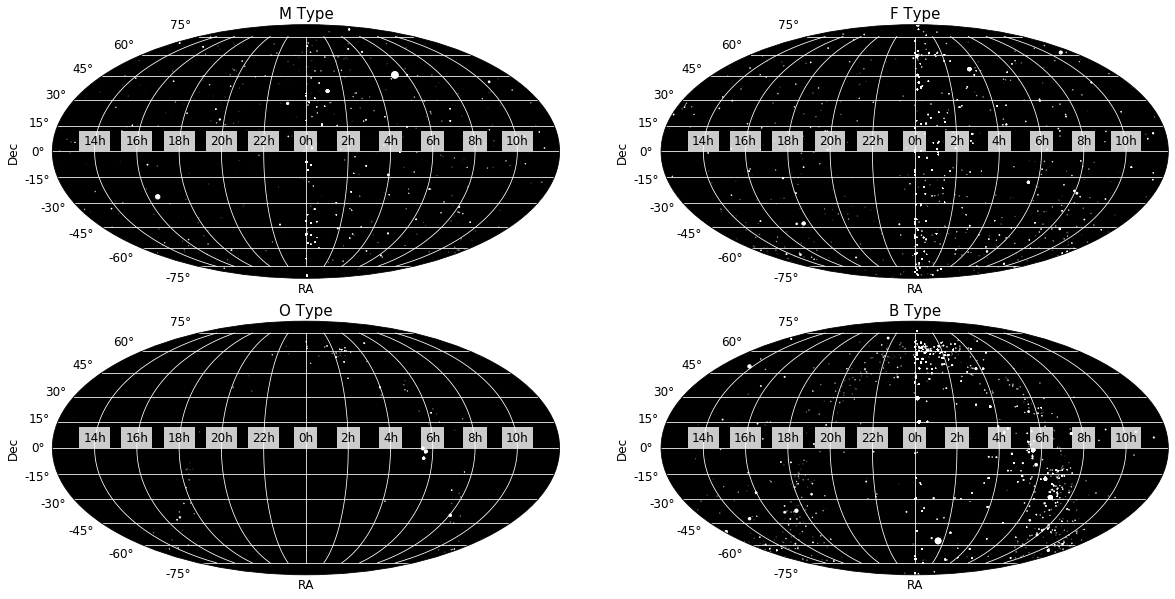

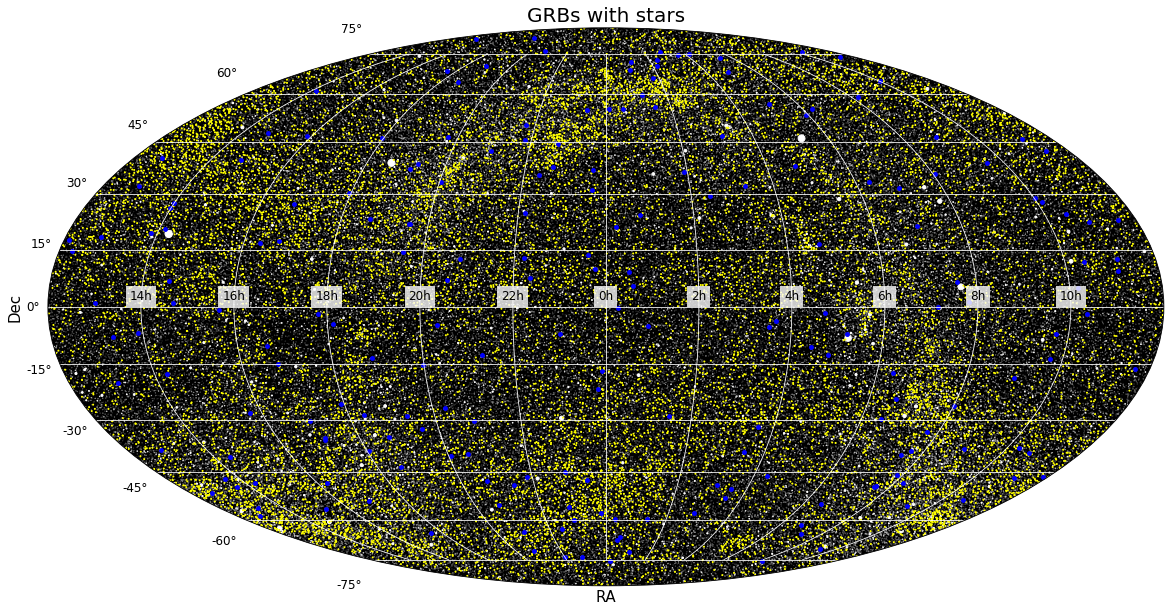

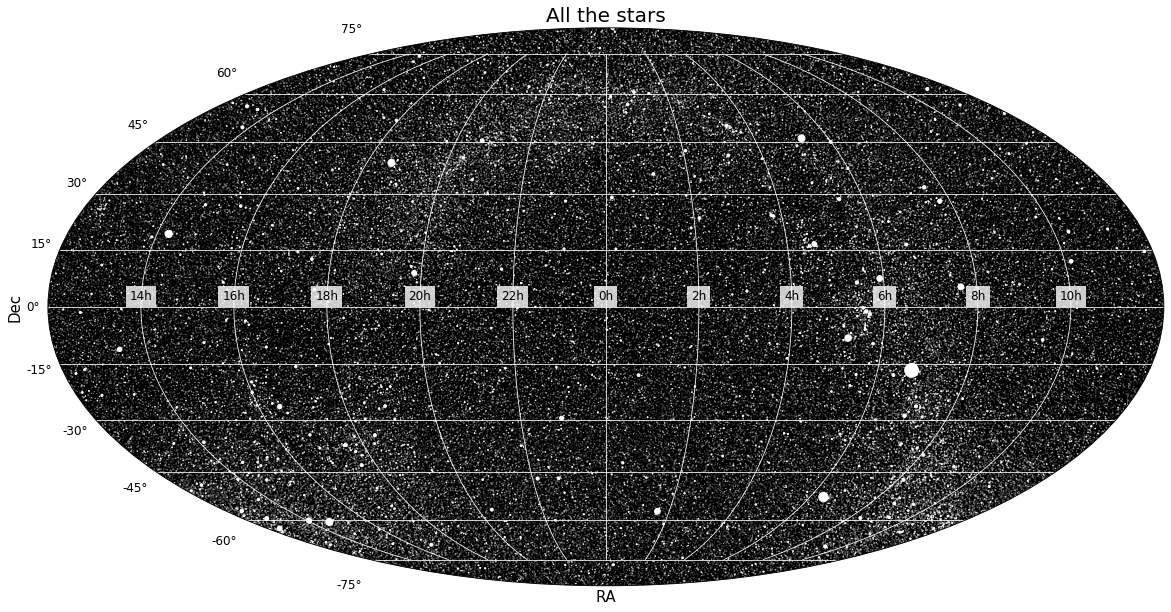

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup

#-------------------------------------PART 1-----------------------------------------

#Creating a list with lines of file as elements
with open('hygdata_v3.csv','r') as f:    
    lines=f.read().split('\n')
del lines[0]
data_stars=[]   
for line in lines:
    data_stars.append(line.split(','))
data_stars.remove([''])

#Storing required data in respective lists
ra=[]; dec=[]; mag=[]; spect=[]; is_var=[]
for item in data_stars:
    ra.append(float(item[7]))
    dec.append(float(item[8]))
    mag.append(float(item[13]))
    spect.append(item[15])
    if(len(item[35])!=0): 
        is_var.append(1) #Given star is a variable
    else:
        is_var.append(0) #Given star is not a variable
        

#Storing IDs of stars of specific spectral type
M_index=[];O_index=[]; B_index=[]; F_index=[]
for item in spect:
    if (len(item)!=0):
        if(item[0]=='M' or item[0]=='m'):
            M_index.append(spect.index(item))
        if(item[0]=='O' or item[0]=='o'):
            O_index.append(spect.index(item))
        if(item[0]=='B' or item[0]=='b'):
            B_index.append(spect.index(item))
        if(item[0]=='F' or item[0]=='f'):
            F_index.append(spect.index(item))


#Converting the required to arrays
ra=np.array(ra)
dec=np.array(dec)
mag=np.array(mag)
is_var=np.array(is_var)
F_index=np.array(F_index)
O_index=np.array(O_index)
B_index=np.array(B_index)
M_index=np.array(M_index)


#Modifying the RA and Dec for Mollweide Projection
ra[ra>=12]=ra[ra>=12]-24
ra=np.pi*ra/12 #hrs to radians
dec=dec*np.pi/180 #degs to radians


#Calculating flux
flux=10**(-mag/2.5)


#Plotting
fig1=plt.figure(figsize=(20,20))


#Currently the flux factor for size has been kept the same for all 4 types, can be adjusted separately to make dimmer ones like O Type brighter

#Plotting O Type
axO=fig1.add_subplot(121, projection="mollweide",facecolor='black')
axO.scatter(ra[O_index],dec[O_index],s=flux[O_index]*50,c='white')
axO.set(title='O Type')
axO.grid(c='w')
axO.title.set_fontsize(15)
axO.set_xlabel("RA")
axO.xaxis.label.set_fontsize(12)
axO.set_ylabel("Dec")
axO.yaxis.label.set_fontsize(12)
axO.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in axO.get_xticklabels() + axO.get_yticklabels():
    label.set_fontsize(12) 
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 )) 

##Plotting B Type
axB=fig1.add_subplot(122, projection="mollweide",facecolor='black')
axB.scatter(ra[B_index],dec[B_index],s=flux[B_index]*50,c='white')
axB.set(title='B Type')
axB.grid(c='w')
axB.title.set_fontsize(15)
axB.set_xlabel("RA")
axB.xaxis.label.set_fontsize(12)
axB.set_ylabel("Dec")
axB.yaxis.label.set_fontsize(12)
axB.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in axB.get_xticklabels() + axB.get_yticklabels():
    label.set_fontsize(12) 
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 )) 

#Plotting M Type
axM=fig1.add_subplot(221, projection="mollweide",facecolor='black')
axM.scatter(ra[M_index],dec[M_index],s=flux[M_index]*50,c='white')
axM.set(title='M Type')
axM.grid(c='w')
axM.title.set_fontsize(15)
axM.set_xlabel("RA")
axM.xaxis.label.set_fontsize(12)
axM.set_ylabel("Dec")
axM.yaxis.label.set_fontsize(12)
axM.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in axM.get_xticklabels() + axM.get_yticklabels():
    label.set_fontsize(12) 
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 )) 
    
#Plotting F Type
axF=fig1.add_subplot(222, projection="mollweide",facecolor='black')
axF.scatter(ra[F_index],dec[F_index],s=flux[F_index]*50,c='white')
axF.set(title='F Type')
axF.grid(c='w')
axF.title.set_fontsize(15)
axF.set_xlabel("RA")
axF.xaxis.label.set_fontsize(12)
axF.set_ylabel("Dec")
axF.yaxis.label.set_fontsize(12)
axF.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in axF.get_xticklabels() + axF.get_yticklabels():
    label.set_fontsize(12) 
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))
    

#----------------------------------------PART 2-----------------------------------------------------

#Accessing the page
page = requests.get("http://astrosat.iucaa.in/czti/?q=grb")
soup = BeautifulSoup(page.content, 'html.parser')

#Collecting data from the page
ra_grb=[]
dec_grb=[]
for i in range(1,298):
    radec=soup.find_all('td') [10+7*(i-1)].get_text() #The required values occur at intervals of 7, i.e. 10,17,24..
    if(',' in radec):
        if(radec[5]!='-'):
            ra_grb.append(float(radec[5:radec.index(',')])) #Stored RA in degs
            dec_grb.append(float(radec[radec.index(',')+1:])) #Stored Dec in degs
ra_grb=np.array(ra_grb)
dec_grb=np.array(dec_grb)


#Modifying the RA and Dec for Mollweide Projection
ra_grb[ra_grb>=180]=ra_grb[ra_grb>=180]-360
ra_grb=ra_grb*np.pi/180
dec_grb=dec_grb*np.pi/180


#Plotting all the enteties
#Marker size for variables has been kept constant but not equal to GRBs because of the difference in quantities which maked fig dirty
fig2=plt.figure(figsize=(20,20))
ax=fig2.add_subplot(projection="mollweide",facecolor='black')
ax.scatter(ra,dec,s=flux*50*(1-is_var),c='white') #Plotting non variable stars
ax.scatter(ra,dec,s=1*is_var,c='yellow') #Plotting variable stars
ax.scatter(ra_grb,dec_grb,c='blue',s=15) #Plotting GRBs
ax.set(title='GRBs with stars')
ax.grid(c='w')
ax.title.set_fontsize(20)
ax.set_xlabel("RA")
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel("Dec")
ax.yaxis.label.set_fontsize(15)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))
    
#Plotting all the stars in the sky
fig3=plt.figure(figsize=(20,20))
ax1=fig3.add_subplot(projection="mollweide",facecolor='black')
ax1.scatter(ra,dec,s=flux*50,c='white')
ax1.set(title='All the stars')
ax1.grid(c='w')
ax1.title.set_fontsize(20)
ax1.set_xlabel("RA")
ax1.xaxis.label.set_fontsize(15)
ax1.set_ylabel("Dec")
ax1.yaxis.label.set_fontsize(15)
ax1.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))